In [1]:
import disk_ecc as original
import disk_ecc_warp_faceontest_ as mine
import disk_ecc_warp_restructure as restructure

import numpy as np
import bettermoments as bm

In [41]:
inc = 88
w_inc = 60
pa = 0
w_r0_param = 40

zcf max 448793612100000.0
zcf min 1495978707000.0
dz max 358124606399.5625
dz min -447297633393000.0
dz shape (500, 131, 1250)
X_0 0.0
X_-1 4487936121000000.0
Y_0 0.0
Y_-1 0.0
X shape (131, 180, 300)
Y shape (131, 180, 300)
Z shape (131, 180, 300)
werid zsky_w True
tdiskZ min -4499564793965148.0
tdiskZ max 4499564793965148.0
zind max 1249.0
zind min 0.0
zind len 7074000
phiind max 129.9999962973046
phiind min 3.7026953933882094e-06
phiind len 7074000
aind max 500.0
aind min 0.0
aind len 7074000


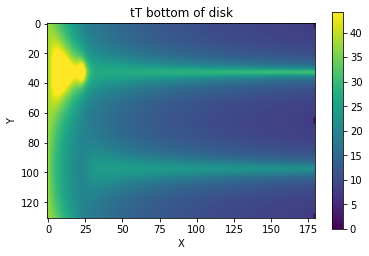

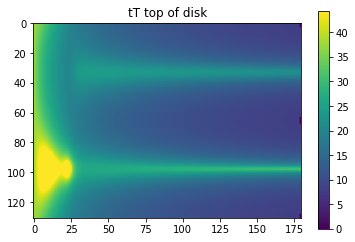

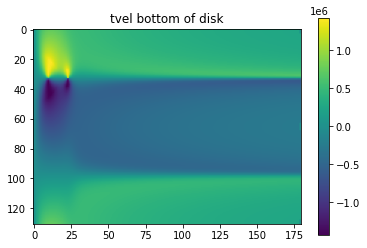

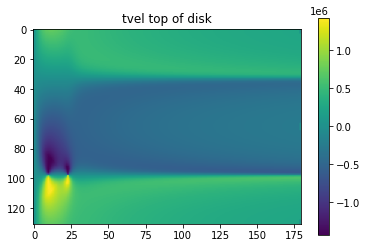

in rt self.sig_col min 0.0
in rt self.sig_col max 0.04409618294981014
in rt self.sig_col mean 0.00024021291756304568


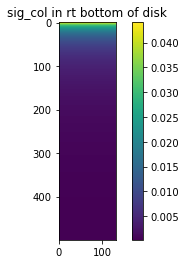

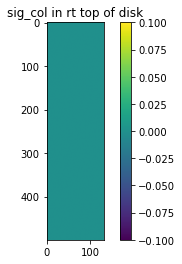

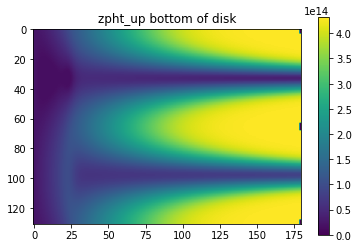

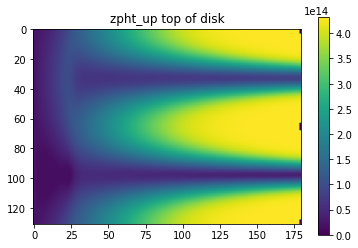

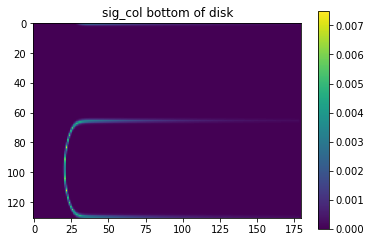

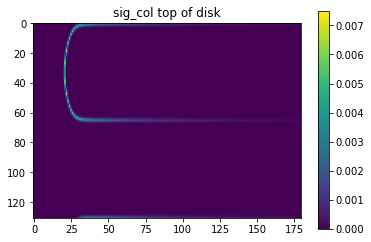

In [42]:
w=restructure.Disk(Tmid0=14, sigbound=[1e-3,np.inf],zmax=30, McoG=1e-4, Aout=300.,incl=inc, w_i=w_inc, w_r0=w_r0_param,w_dr=40,w_pa=pa)


In [43]:
#%run raytrace_3dwarp.py
#x=mine.Disk(Tmid0=14, sigbound=[1e-3,np.inf],zmax=30, McoG=1e-4, Aout=300.,incl=inc, w_i=0, w_r0=20,w_dr=40,w_pa=0)


In [44]:
%run raytrace_3dwarp.py

In [45]:

total_model(w,imres=0.05,distance=20.,chanmin=-2.24,nchans=15,chanstep=0.32,flipme=False,Jnum=2,freq0=345.79599,xnpix=512,vsys=5.79,PA=312.46,offs=[0.0,0.0],
                modfile='warpmodel_restructure_wi{}_pa{}_inc{}'.format(w_inc, pa, inc),abund=1.,obsv=None,wind=False,isgas=True,includeDust=False,extra=0,bin=1,hanning=False,
                L_cloud=False, tau = [0,], sigma_c = [6,], velocity_c =[2,],manual_chan_params=False,response_function=False)



zcf max 448793612100000.0
zcf min 1495978707000.0
dz max 358124606399.5625
dz min -447297633393000.0
dz shape (500, 131, 1250)
X shape (131, 180)
X_0 0.0
X_-1 4487936121000000.0
Y_0 0.0
Y_-1 0.0
zmax 448793612100000.0
tdiskZmax 4867257393063528.0
zind max 1249.0
zind min 0.0
zind len 7074000
aind max 500.0
aind min 0.0
aind len 7074000
phiind max 130.0
phiind min 0.0
phiind len 7074000


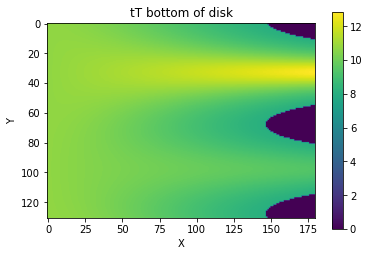

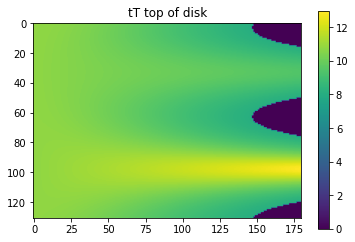

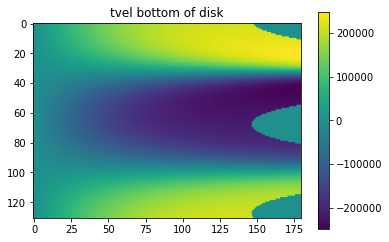

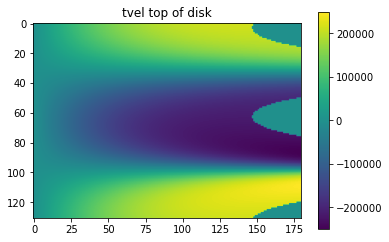

in rt self.sig_col min 0.0
in rt self.sig_col max 0.04409618294981014
in rt self.sig_col mean 0.00024021291756304568


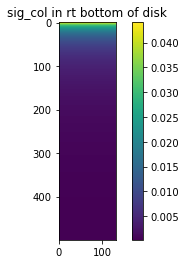

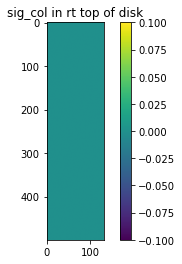

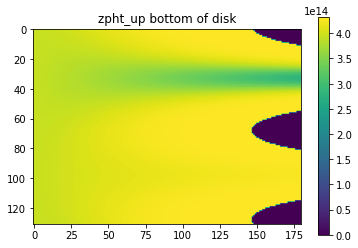

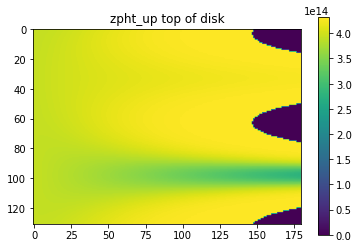

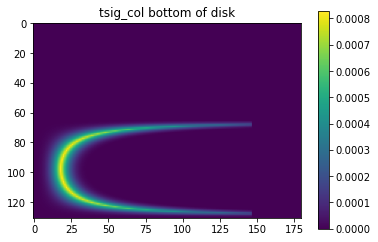

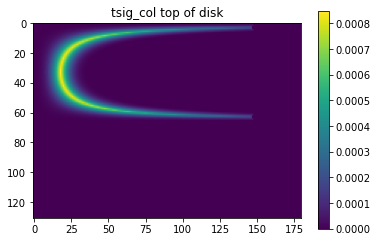

In [8]:
#%run raytrace.py
y=original.Disk(Tmid0=14, sigbound=[1e-3,np.inf],zmax=30, McoG=1e-4, Aout=300.,incl=inc)

In [9]:
#%run raytrace.py

In [10]:
'''
total_model(y,imres=0.05,distance=20.,chanmin=-2.24,nchans=15,chanstep=0.32,flipme=False,Jnum=2,freq0=345.79599,xnpix=512,vsys=5.79,PA=312.46,offs=[0.0,0.0],
                modfile='kevinmodel_inc{}'.format(inc),abund=1.,obsv=None,wind=False,isgas=True,includeDust=False,extra=0,bin=1,hanning=False,
                L_cloud=False, tau = [0,], sigma_c = [6,], velocity_c =[2,],manual_chan_params=False,response_function=False)
'''
'''
hdul = fits.open('kevinmodel_inc{}'.format(inc), mode='update')
hdul[0].header['RESTFRQ'] = 345.7959899e9  # Example: CO(2-1) in Hz
hdul[0].header['BUNIT'] = 'Jansky'
hdul.flush()
hdul.close()
'''


"\nhdul = fits.open('kevinmodel_inc{}'.format(inc), mode='update')\nhdul[0].header['RESTFRQ'] = 345.7959899e9  # Example: CO(2-1) in Hz\nhdul[0].header['BUNIT'] = 'Jansky'\nhdul.flush()\nhdul.close()\n"

In [11]:
8.43*2

16.86